<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/xAI-gender-based-mental-health-analysis/blob/main/age-diabetes-eda-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

In [36]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

%matplotlib inline
warnings.filterwarnings('ignore')

In [37]:
plt.rcParams.update({
    "figure.dpi": 150,
    "savefig.dpi": 600,
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})
sns.set_style("white")
sns.set_context("paper", font_scale=1.2)
colors = sns.color_palette("colorblind")

export_png = True

out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)

def safe_name(s: str) -> str:
    return "".join(c if (c.isalnum() or c in "-_") else "_" for c in s).strip("_")

### **Load dataset**

In [38]:
df = pd.read_csv("Diabetes health indicators Binary.csv")

### **Basic Inspection**

In [39]:
df.shape

(253680, 22)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [41]:
classes = df['Sex'].value_counts()
print(classes)

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


In [42]:
print(df["Sex"].value_counts(normalize=True) * 100)

Sex
0.0    55.965784
1.0    44.034216
Name: proportion, dtype: float64


- 0 = female
- 1 = male

### **Gender Distribution**

gender_distribution


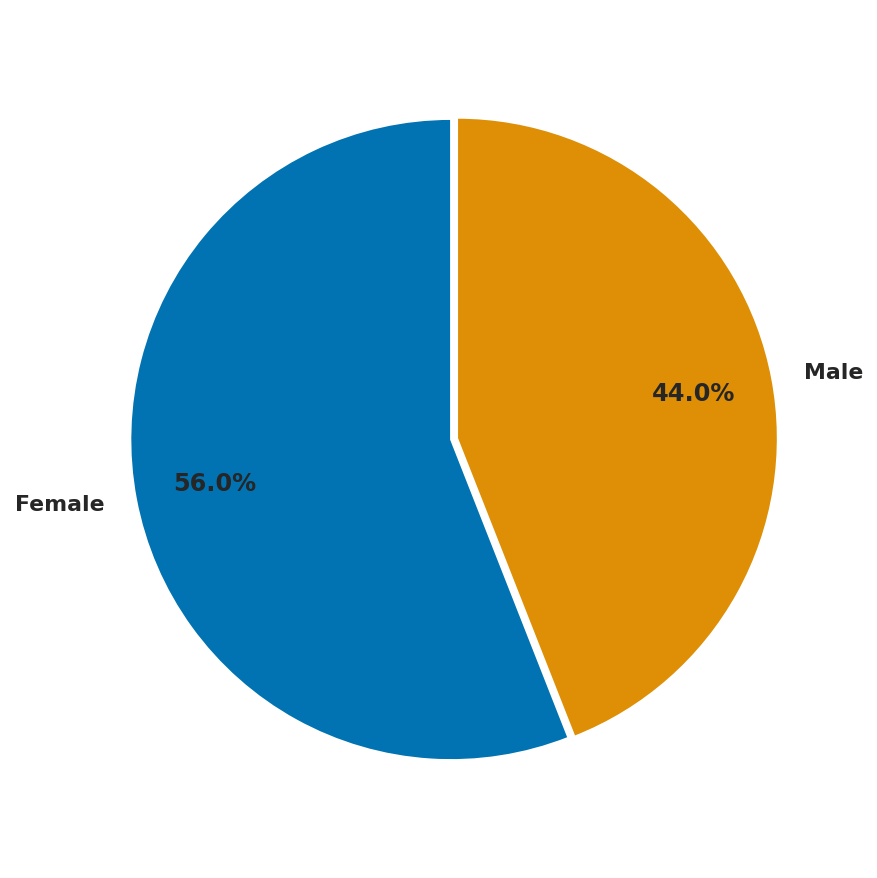

In [43]:
labels = ['Male' if x == 1 else 'Female' for x in classes.index]

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    classes,
    labels=labels,
    startangle=90,
    explode=[0.01, 0.01],
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.75,
    labeldistance=1.1,
    textprops={'fontweight': 'bold'}
)

ax.axis('equal')
fig.tight_layout()

print("gender_distribution")

base_name = "gender_distribution"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)

plt.show()
plt.close(fig)

### **Diabetes Prevalence by Gender**

Prevalence of Diagnosed Diabetes by Gender


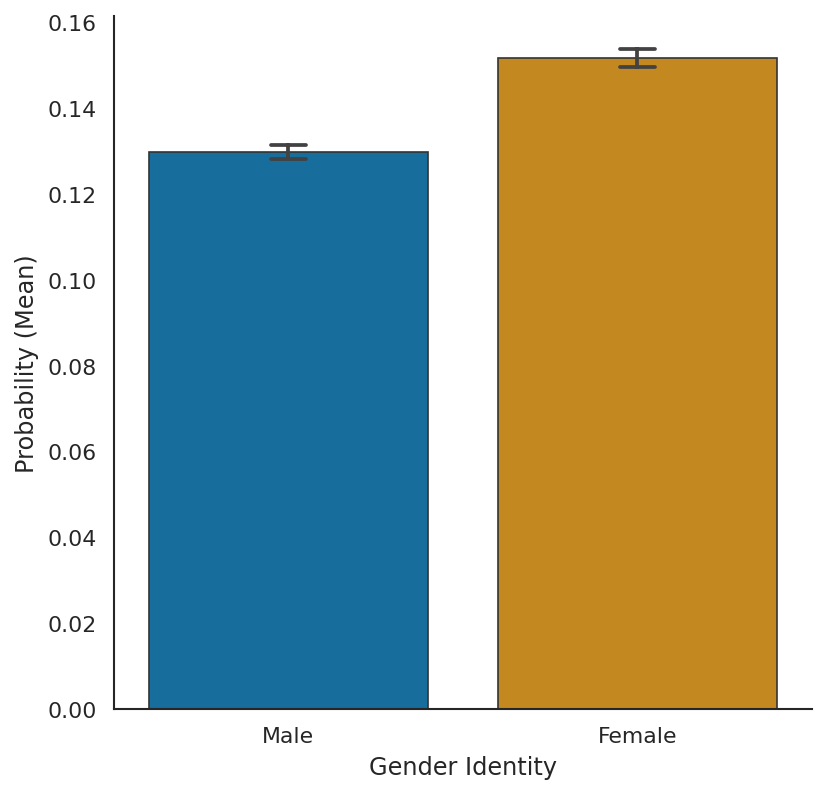

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.barplot(
    data=df,
    x='Sex',
    y='Diabetes_binary',
    palette=colors,
    edgecolor=".2",
    capsize=.1
)

print('Prevalence of Diagnosed Diabetes by Gender')

plt.xlabel('Gender Identity')
plt.ylabel('Probability (Mean)')
plt.xticks([0, 1], ['Male', 'Female'])

sns.despine()

base_name = "diabetes_prevalence_by_gender"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)

plt.show()
plt.close(fig)

### **Diabetes Distribution**

In [45]:
print(df["Diabetes_binary"].value_counts())

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


In [46]:
diabetes_counts = df["Diabetes_binary"].dropna().value_counts()
diabetes_labels = ['Diabetes' if x == 1 else 'No Diabetes' for x in diabetes_counts.index]

Diabetes Diagnosis Distribution


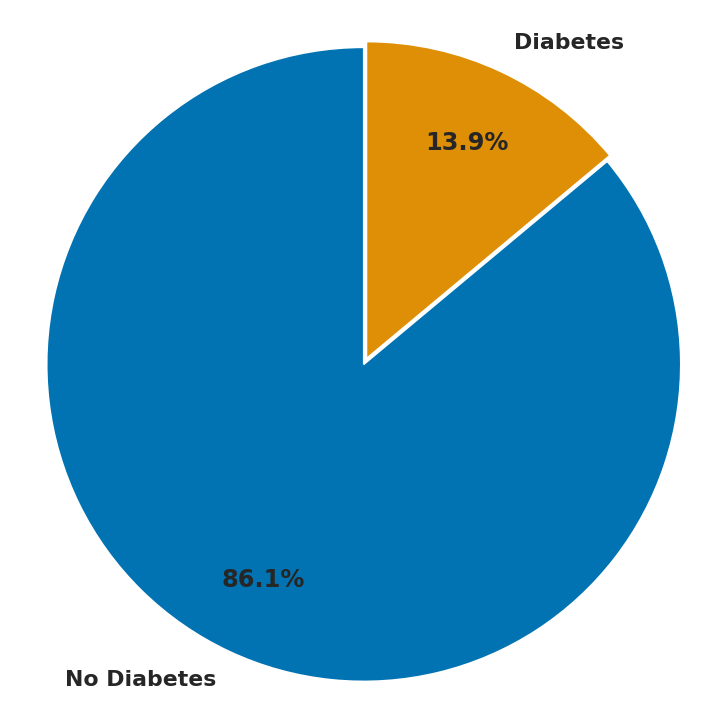

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    diabetes_counts,
    labels=diabetes_labels,
    startangle=90,
    explode=[0.01, 0.01],
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.75,
    labeldistance=1.1,
    textprops={'fontweight': 'bold'}
)

ax.axis('equal')
print('Diabetes Diagnosis Distribution')

base_name = "diabetes_diagnosis_distribution"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)


plt.show()
plt.close(fig)

### **Diabetes Diagnosis by Gender**

Diabetes Diagnosis Rates by Gender


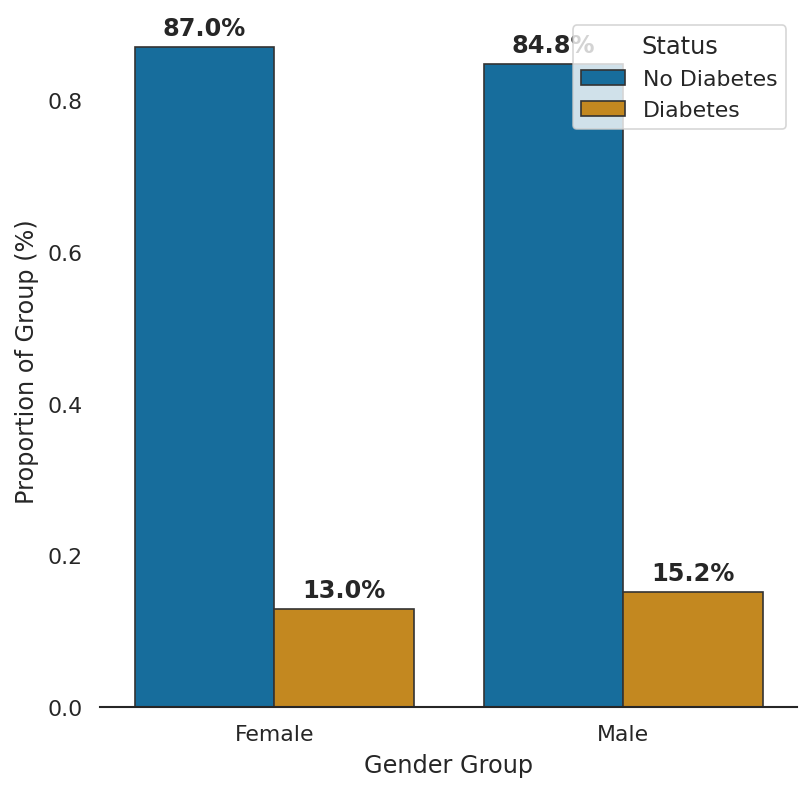

In [48]:
df_plot = df.dropna(subset=['Diabetes_binary']).copy()

prop_df = (df_plot.groupby("Sex")["Diabetes_binary"]
           .value_counts(normalize=True)
           .rename("percentage")
           .reset_index())

prop_df['Sex'] = prop_df['Sex'].map({1.0: 'Male', 0.0: 'Female'})
prop_df['Diabetes_binary'] = prop_df['Diabetes_binary'].map({1.0: 'Diabetes', 0.0: 'No Diabetes'})

fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.barplot(
    data=prop_df,
    x='Sex',
    y='percentage',
    hue='Diabetes_binary',
    palette=colors,
    edgecolor=".2"
)

for p in ax.patches:
    height = p.get_height()
    if height > 0.001: # Only label if the bar actually exists
        ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontweight='bold')


print('Diabetes Diagnosis Rates by Gender')
plt.xlabel('Gender Group')
plt.ylabel('Proportion of Group (%)')
plt.legend(title='Status', loc='upper right')

sns.despine(left=True)

base_name = "diabetes_distribution_by_gender"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)


plt.show()
plt.close(fig)

In [49]:
df_plot = df.dropna(subset=['Diabetes_binary']).copy()
raw_counts = pd.crosstab(df_plot['Sex'], df_plot['Diabetes_binary'])

raw_counts.index = ['Female', 'Male']
raw_counts.columns = ['No Diabetes', 'Diabetes']

raw_counts_with_totals = raw_counts.copy()
raw_counts_with_totals['Total'] = raw_counts_with_totals.sum(axis=1)
raw_counts_with_totals.loc['Total'] = raw_counts_with_totals.sum()

print("--- Raw Counts: Diabetes Diagnosis by Gender ---")
print(raw_counts_with_totals)

--- Raw Counts: Diabetes Diagnosis by Gender ---
        No Diabetes  Diabetes   Total
Female       123563     18411  141974
Male          94771     16935  111706
Total        218334     35346  253680


### **Final Data**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [51]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [52]:
df.to_csv('final_dataset.csv', index=False)
files.download('final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>